## Setup

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn import svm
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
import sys

## Funções Auxiliares

### Error

In [2]:
def get_error(y,preds):
    '''
        Calcula o erro binário de todas as predições
        Na prática, conta quantas vezes o valor de saída
        foi diferente do valor esperado

        Args:
            X: pontos (x,y) do conjunto de treinamento
        Return:
            erro médio binário
    '''
        
    # Neste problema, temos uma saída binária,
    # por isso vamos calcular quantas vezes 
    # h(x) é diferente de f(x)
    # onde h é a hipótese e f a target
    error = 0
    for y_true,y_pred in zip(y,preds):
        if y_true != y_pred:
            error += 1/len(preds)
    return error

### Função de plot

In [3]:
def plot_scatter(dataset, support_vectors=None):
    '''
        Gera o gráfico de pontos que pode ser junto
        aos vetores de suporte do SVM

        Args:
            dataset: pontos (x,y)
            supports_vetors: vetores de suporte do 
            modelo de SVM usado para classicação
    '''
    
    size = 5
    
    # Filtra e plota os exemplos positivos
    positives_examples = dataset[dataset['class'] == 1.0]
    plt.scatter(positives_examples['at1'],positives_examples['at2'], s=size, color='yellow', label='1')

    # Filtra e plota os exemplos negativos
    negative_examples = dataset[dataset['class'] == -1.0]
    plt.scatter(negative_examples['at1'],negative_examples['at2'], s=size,color='black', label='-1')
    
    if support_vectors is not None:
        plt.scatter(support_vectors[:,0], support_vectors[:,1], s=size, color='red', label='Vetores de Suporte')
        plt.title('Diagrama de Dispersão com o Limite de Decisão')
    else:
        plt.title('Diagrama de Dispersão dos Dados')

    
    plt.xlabel('At1')
    plt.ylabel('At2')
    plt.legend(loc='upper left')

    #plt.show()
    plt.savefig('dispersao_banana.pdf')


## Banana dataset

In [4]:
def load_banana_dataset():
    '''
        Carrega e faz o pré-processamento
        do conjunto de treinamento

        Return:
            DataFrame contendo o conjunto
            de treinamento
    '''
    dataset = {'at1': [], 'at2': [], 'class': []}
    with open('data/banana.dat') as fp:
        lines = fp.readlines()
    
    # Ignores the first seven lines
    lines = lines[7:][:]
    
    for line in lines:
        at1, at2, _class = line.replace('\n', '').split(',')
        dataset['at1'].append(float(at1))
        dataset['at2'].append(float(at2))
        dataset['class'].append(float(_class))
    return pd.DataFrame.from_dict(dataset)

In [5]:
dataset = load_banana_dataset()

In [6]:
X = dataset[['at1', 'at2']]
y = dataset['class']

## Experimento 1

### Gráfico de Dispersão

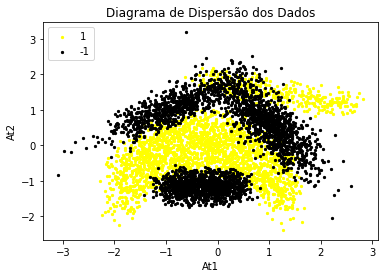

In [7]:
plot_scatter(dataset)

### SVM

#### Sigmoide

In [8]:
results_svm_sigmoide = {}
for k in [2,5,10]:
    
    print(f'k = {k}')
    
    results_svm_sigmoide[f'k_{k}'] = {'gamma_1': {'error': 0, 'accuracy': 0}, 'gamma_0.5': {'error': 0, 'accuracy': 0}, 'gamma_0.01': {'error': 0, 'accuracy': 0}}
    
    kf = KFold(n_splits=k)
    for train_index, test_index in tqdm(kf.split(X,y)):
        
        #print(f'Train size = {len(train_index)}, Test size = {len(test_index)}')
        
        for gamma in tqdm([1,0.5,0.01]):
            
            #print(f'Kernel = sigmoide and gamma = {gamma}')
            
            svm_sigmoide_model = svm.SVC(kernel='sigmoid', gamma=gamma)
            svm_sigmoide_model.fit(X.loc[train_index], y.loc[train_index])

            # Testo o modelo nos dados de teste
            predictions = svm_sigmoide_model.predict(X.loc[test_index])
            
            # Conto quantas vezes o modelo errou
            error = get_error(predictions,y.loc[test_index])
            results_svm_sigmoide[f'k_{k}'][f'gamma_{str(gamma)}']['error'] += round(error/k,3)
            
            # Calculo a acurácia do modelo
            acc = svm_sigmoide_model.score(X.loc[test_index],y.loc[test_index])
            results_svm_sigmoide[f'k_{k}'][f'gamma_{str(gamma)}']['accuracy'] += round(acc/k,3)
            
            results_svm_sigmoide[f'k_{k}'][f'gamma_{str(gamma)}']['error'] = round(results_svm_sigmoide[f'k_{k}'][f'gamma_{str(gamma)}']['error'],3)
            results_svm_sigmoide[f'k_{k}'][f'gamma_{str(gamma)}']['accuracy'] = round(results_svm_sigmoide[f'k_{k}'][f'gamma_{str(gamma)}']['accuracy'],3)
            
            del predictions, acc, svm_sigmoide_model
    del kf

0it [00:00, ?it/s]
  0%|          | 0/3 [00:00<?, ?it/s]

k = 2



100%|██████████| 3/3 [00:02<00:00,  1.05it/s]
1it [00:02,  2.85s/it]
100%|██████████| 3/3 [00:02<00:00,  1.16it/s]
2it [00:05,  2.72s/it]
0it [00:00, ?it/s]
  0%|          | 0/3 [00:00<?, ?it/s]

k = 5



100%|██████████| 3/3 [00:04<00:00,  1.42s/it]
1it [00:04,  4.27s/it]
100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
2it [00:08,  4.20s/it]
100%|██████████| 3/3 [00:04<00:00,  1.41s/it]
3it [00:12,  4.22s/it]
100%|██████████| 3/3 [00:04<00:00,  1.51s/it]
4it [00:17,  4.34s/it]
100%|██████████| 3/3 [00:04<00:00,  1.37s/it]
5it [00:21,  4.26s/it]
0it [00:00, ?it/s]
  0%|          | 0/3 [00:00<?, ?it/s]

k = 10



100%|██████████| 3/3 [00:05<00:00,  1.67s/it]
1it [00:05,  5.00s/it]
100%|██████████| 3/3 [00:05<00:00,  1.79s/it]
2it [00:10,  5.23s/it]
100%|██████████| 3/3 [00:05<00:00,  1.80s/it]
3it [00:15,  5.31s/it]
100%|██████████| 3/3 [00:05<00:00,  1.74s/it]
4it [00:21,  5.28s/it]
100%|██████████| 3/3 [00:04<00:00,  1.61s/it]
5it [00:25,  5.12s/it]
100%|██████████| 3/3 [00:05<00:00,  1.77s/it]
6it [00:31,  5.18s/it]
100%|██████████| 3/3 [00:05<00:00,  1.80s/it]
7it [00:36,  5.26s/it]
100%|██████████| 3/3 [00:04<00:00,  1.55s/it]
8it [00:41,  5.07s/it]
100%|██████████| 3/3 [00:04<00:00,  1.57s/it]
9it [00:45,  4.96s/it]
100%|██████████| 3/3 [00:04<00:00,  1.40s/it]
10it [00:50,  5.02s/it]


In [9]:
pd.DataFrame.from_dict(results_svm_sigmoide)

,k_2,k_5,k_10
gamma_1,"{'error': 0.717, 'accuracy': 0.283}","{'error': 0.718, 'accuracy': 0.282}","{'error': 0.719, 'accuracy': 0.281}"
gamma_0.5,"{'error': 0.707, 'accuracy': 0.293}","{'error': 0.709, 'accuracy': 0.291}","{'error': 0.71, 'accuracy': 0.29}"
gamma_0.01,"{'error': 0.448, 'accuracy': 0.552}","{'error': 0.448, 'accuracy': 0.552}","{'error': 0.449, 'accuracy': 0.551}"


#### RBF

In [10]:
results_svm_rbf = {}
for k in [2,5,10]:
    
    print(f'k = {k}')
    
    results_svm_rbf[f'k_{k}'] = {'gamma_1': {'error': 0, 'accuracy': 0}, 'gamma_0.5': {'error': 0, 'accuracy': 0}, 'gamma_0.01': {'error': 0, 'accuracy': 0}}
    
    kf = KFold(n_splits=k)
    for train_index, test_index in tqdm(kf.split(X,y)):
        
        #print(f'Train size = {len(train_index)}, Test size = {len(test_index)}')
        
        for gamma in tqdm([1,0.5,0.01]):
            
            #print(f'Kernel = rbf and gamma = {gamma}')
            
            svm_rbf_model = svm.SVC(kernel='rbf', gamma=gamma)
            svm_rbf_model.fit(X.loc[train_index], y.loc[train_index])

            # Testo o modelo nos dados de teste
            predictions = svm_rbf_model.predict(X.loc[test_index])
            
            # Conto quantas vezes o modelo errou
            error = get_error(predictions,y.loc[test_index])
            results_svm_rbf[f'k_{k}'][f'gamma_{str(gamma)}']['error'] += round(error/k,3)
            
            # Calculo a acurácia do modelo
            acc = svm_rbf_model.score(X.loc[test_index],y.loc[test_index])
            results_svm_rbf[f'k_{k}'][f'gamma_{str(gamma)}']['accuracy'] += round(acc/k,3)
            
            results_svm_rbf[f'k_{k}'][f'gamma_{str(gamma)}']['error'] = round(results_svm_rbf[f'k_{k}'][f'gamma_{str(gamma)}']['error'],3)
            results_svm_rbf[f'k_{k}'][f'gamma_{str(gamma)}']['accuracy'] = round(results_svm_rbf[f'k_{k}'][f'gamma_{str(gamma)}']['accuracy'],3)
            
            del predictions, acc, svm_rbf_model
    del kf

0it [00:00, ?it/s]
  0%|          | 0/3 [00:00<?, ?it/s]

k = 2



100%|██████████| 3/3 [00:01<00:00,  2.19it/s]
1it [00:01,  1.37s/it]
100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
2it [00:02,  1.31s/it]
0it [00:00, ?it/s]
  0%|          | 0/3 [00:00<?, ?it/s]

k = 5



100%|██████████| 3/3 [00:01<00:00,  1.99it/s]
1it [00:01,  1.51s/it]
100%|██████████| 3/3 [00:01<00:00,  1.93it/s]
2it [00:03,  1.54s/it]
100%|██████████| 3/3 [00:01<00:00,  1.98it/s]
3it [00:04,  1.53s/it]
100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
4it [00:06,  1.58s/it]
100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
5it [00:08,  1.64s/it]
0it [00:00, ?it/s]
  0%|          | 0/3 [00:00<?, ?it/s]

k = 10



100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
1it [00:01,  1.73s/it]
100%|██████████| 3/3 [00:01<00:00,  1.53it/s]
2it [00:03,  1.87s/it]
100%|██████████| 3/3 [00:02<00:00,  1.47it/s]
3it [00:05,  1.95s/it]
100%|██████████| 3/3 [00:01<00:00,  1.67it/s]
4it [00:07,  1.89s/it]
100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
5it [00:09,  1.84s/it]
100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
6it [00:11,  1.81s/it]
100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
7it [00:12,  1.79s/it]
100%|██████████| 3/3 [00:01<00:00,  1.91it/s]
8it [00:14,  1.72s/it]
100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
9it [00:16,  1.70s/it]
100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
10it [00:17,  1.77s/it]


In [11]:
pd.DataFrame.from_dict(results_svm_rbf)

,k_2,k_5,k_10
gamma_1,"{'error': 0.094, 'accuracy': 0.906}","{'error': 0.094, 'accuracy': 0.906}","{'error': 0.092, 'accuracy': 0.908}"
gamma_0.5,"{'error': 0.097, 'accuracy': 0.903}","{'error': 0.098, 'accuracy': 0.902}","{'error': 0.098, 'accuracy': 0.902}"
gamma_0.01,"{'error': 0.422, 'accuracy': 0.578}","{'error': 0.416, 'accuracy': 0.584}","{'error': 0.405, 'accuracy': 0.595}"


#### Linear

In [12]:
results_svm_linear = {}
for k in [2,5,10]:
    
    print(f'k = {k}')
    
    results_svm_linear[f'k_{k}'] = {'error': 0, 'accuracy': 0}
    
    kf = KFold(n_splits=k)
    for train_index, test_index in tqdm(kf.split(X,y)):
        
        #print(f'Train size = {len(train_index)}, Test size = {len(test_index)}')
            
        #print('Kernel = linear')

        svm_linear_model = svm.SVC(kernel='linear')
        svm_linear_model.fit(X.loc[train_index], y.loc[train_index])

        # Testo o modelo nos dados de teste
        predictions = svm_linear_model.predict(X.loc[test_index])

        # Conto quantas vezes o modelo errou
        error = get_error(predictions,y.loc[test_index])
        results_svm_linear[f'k_{k}']['error'] += round(error/k,3)

        # Calculo a acurácia do modelo
        acc = svm_linear_model.score(X.loc[test_index],y.loc[test_index])
        results_svm_linear[f'k_{k}']['accuracy'] += round(acc/k,3)
        
        results_svm_linear[f'k_{k}']['error'] = round(results_svm_linear[f'k_{k}']['error'],3)
        results_svm_linear[f'k_{k}']['accuracy'] = round(results_svm_linear[f'k_{k}']['accuracy'],3)

        del predictions, acc,svm_linear_model
    del kf

0it [00:00, ?it/s]

k = 2


2it [00:00,  2.13it/s]
0it [00:00, ?it/s]

k = 5


5it [00:03,  1.39it/s]
0it [00:00, ?it/s]

k = 10


10it [00:08,  1.19it/s]


#### Polinomial

In [13]:
results_svm_poly = {}
for k in [2,5,10]:
    
    print(f'k = {k}')
    
    results_svm_poly[f'k_{k}'] = {'error': 0, 'accuracy': 0}
    
    kf = KFold(n_splits=k)
    for train_index, test_index in tqdm(kf.split(X,y)):
        
        #print(f'Train size = {len(train_index)}, Test size = {len(test_index)}')
            
        #print('Kernel = poly')

        svm_poly_model = svm.SVC(kernel='poly', degree=3)
        svm_poly_model.fit(X.loc[train_index], y.loc[train_index])

        # Testo o modelo nos dados de teste
        predictions = svm_poly_model.predict(X.loc[test_index])

        # Conto quantas vezes o modelo errou
        error = get_error(predictions,y.loc[test_index])
        results_svm_poly[f'k_{k}']['error'] += round(error/k,3)

        # Calculo a acurácia do modelo
        acc = svm_poly_model.score(X.loc[test_index],y.loc[test_index])
        results_svm_poly[f'k_{k}']['accuracy'] += round(acc/k,3)
        
        results_svm_poly[f'k_{k}']['error'] = round(results_svm_poly[f'k_{k}']['error'],3)
        results_svm_poly[f'k_{k}']['accuracy'] = round(results_svm_poly[f'k_{k}']['accuracy'],3)

        del predictions, acc, svm_poly_model
    del kf

0it [00:00, ?it/s]

k = 2


2it [00:01,  1.77it/s]
0it [00:00, ?it/s]

k = 5


5it [00:05,  1.08s/it]
0it [00:00, ?it/s]

k = 10


10it [00:11,  1.15s/it]


In [14]:
pd.DataFrame.from_dict(results_svm_poly)

,k_2,k_5,k_10
error,0.364,0.362,0.362
accuracy,0.636,0.638,0.638


### Resultados SVM

Sigmoide

In [15]:
pd.DataFrame.from_dict(results_svm_sigmoide)

,k_2,k_5,k_10
gamma_1,"{'error': 0.717, 'accuracy': 0.283}","{'error': 0.718, 'accuracy': 0.282}","{'error': 0.719, 'accuracy': 0.281}"
gamma_0.5,"{'error': 0.707, 'accuracy': 0.293}","{'error': 0.709, 'accuracy': 0.291}","{'error': 0.71, 'accuracy': 0.29}"
gamma_0.01,"{'error': 0.448, 'accuracy': 0.552}","{'error': 0.448, 'accuracy': 0.552}","{'error': 0.449, 'accuracy': 0.551}"


RBF

In [16]:
pd.DataFrame.from_dict(results_svm_rbf)

,k_2,k_5,k_10
gamma_1,"{'error': 0.094, 'accuracy': 0.906}","{'error': 0.094, 'accuracy': 0.906}","{'error': 0.092, 'accuracy': 0.908}"
gamma_0.5,"{'error': 0.097, 'accuracy': 0.903}","{'error': 0.098, 'accuracy': 0.902}","{'error': 0.098, 'accuracy': 0.902}"
gamma_0.01,"{'error': 0.422, 'accuracy': 0.578}","{'error': 0.416, 'accuracy': 0.584}","{'error': 0.405, 'accuracy': 0.595}"


Linear

In [17]:
pd.DataFrame.from_dict(results_svm_linear)

,k_2,k_5,k_10
error,0.448,0.448,0.449
accuracy,0.552,0.552,0.551


Polinomial

In [18]:
pd.DataFrame.from_dict(results_svm_poly)

,k_2,k_5,k_10
error,0.364,0.362,0.362
accuracy,0.636,0.638,0.638


#### Plot vetores de suporte - melhor modelo

Melhor model é o que usa Kernel RBF, gamma igual a 1 e k = 10.

In [22]:
kf = KFold(n_splits=10)
for train_index, test_index in tqdm(kf.split(X,y)):
    best_model = svm.SVC(kernel='rbf', gamma=1)
    best_model.fit(X.loc[train_index], y.loc[train_index])

10it [00:02,  4.50it/s]


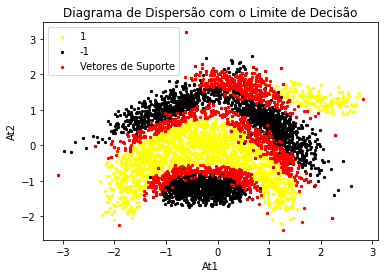

In [23]:
plot_scatter(dataset, best_model.support_vectors_)

#### Plot vetores de suporte - pior modelo

Pior modelo é o que usa Kernel sigmóide, gamma igual a 1 e k = 10.

In [24]:
kf = KFold(n_splits=10)
for train_index, test_index in tqdm(kf.split(X,y)):
    worst_model = svm.SVC(kernel='sigmoid', gamma=1)
    worst_model.fit(X.loc[train_index], y.loc[train_index])

10it [00:15,  1.52s/it]


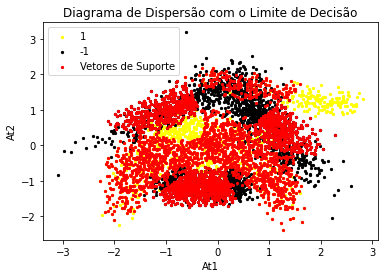

In [25]:
plot_scatter(dataset, worst_model.support_vectors_)

### Experimento usando KNN

In [26]:
results_knn = {}
for k in [2,5,10]:
    
    print(f'k = {k}')
    
    results_knn[f'k_{k}'] = {'n_7': {'error': 0, 'accuracy': 0}, 'n_9': {'error': 0, 'accuracy': 0}, 'n_11': {'error': 0, 'accuracy': 0}}
    
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X,y):
        
        #print(f'Train size = {len(train_index)}, Test size = {len(test_index)}')
            
        #print(f'KNN k={n}')
        
        for n in tqdm([7,9,11]):

            knn_model = KNeighborsClassifier(n_neighbors=n)
            knn_model.fit(X.loc[train_index], y.loc[train_index])

            # Testo o modelo nos dados de teste
            predictions = knn_model.predict(X.loc[test_index])

            # Conto quantas vezes o modelo errou
            error = get_error(predictions,y.loc[test_index])
            results_knn[f'k_{k}'][f'n_{n}']['error'] += round(error/k,3)

            # Calculo a acurácia do modelo
            acc = knn_model.score(X.loc[test_index],y.loc[test_index])
            results_knn[f'k_{k}'][f'n_{n}']['accuracy'] += round(acc/k,3)
            
            results_knn[f'k_{k}'][f'n_{n}']['error'] = round(results_knn[f'k_{k}'][f'n_{n}']['error'],3)
            results_knn[f'k_{k}'][f'n_{n}']['accuracy'] = round(results_knn[f'k_{k}'][f'n_{n}']['accuracy'],3)

            del predictions, acc, knn_model
    del kf

 33%|███▎      | 1/3 [00:00<00:00,  6.03it/s]

k = 2


 33%|███▎      | 1/3 [00:00<00:00,  8.62it/s]

k = 5


  0%|          | 0/3 [00:00<?, ?it/s]

k = 10


100%|██████████| 3/3 [00:00<00:00, 22.68it/s]


Resultados KNN

In [27]:
pd.DataFrame.from_dict(results_knn)

,k_2,k_5,k_10
n_7,"{'error': 0.107, 'accuracy': 0.893}","{'error': 0.109, 'accuracy': 0.891}","{'error': 0.109, 'accuracy': 0.891}"
n_9,"{'error': 0.104, 'accuracy': 0.896}","{'error': 0.103, 'accuracy': 0.897}","{'error': 0.105, 'accuracy': 0.895}"
n_11,"{'error': 0.103, 'accuracy': 0.897}","{'error': 0.104, 'accuracy': 0.896}","{'error': 0.103, 'accuracy': 0.897}"
